In [1]:
import pandas as pd
import numpy as np

import tubesml as tml

from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import RegressorMixin, BaseEstimator
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline

from tubesml.base import BaseTransformer

from src.model_validation import TSCrossValidate, summary_evaluation, fold_evaluation
from src.model_helpers import DailyModel

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv("data_raw/train.csv")

df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [3]:
ts_folds = TimeSeriesSplit(n_splits=7, test_size=180)

for i, (train_index, test_index) in enumerate(ts_folds.split(df)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   0    1    2 ... 7758 7759 7760]
  Test:  index=[7761 7762 7763 7764 7765 7766 7767 7768 7769 7770 7771 7772 7773 7774
 7775 7776 7777 7778 7779 7780 7781 7782 7783 7784 7785 7786 7787 7788
 7789 7790 7791 7792 7793 7794 7795 7796 7797 7798 7799 7800 7801 7802
 7803 7804 7805 7806 7807 7808 7809 7810 7811 7812 7813 7814 7815 7816
 7817 7818 7819 7820 7821 7822 7823 7824 7825 7826 7827 7828 7829 7830
 7831 7832 7833 7834 7835 7836 7837 7838 7839 7840 7841 7842 7843 7844
 7845 7846 7847 7848 7849 7850 7851 7852 7853 7854 7855 7856 7857 7858
 7859 7860 7861 7862 7863 7864 7865 7866 7867 7868 7869 7870 7871 7872
 7873 7874 7875 7876 7877 7878 7879 7880 7881 7882 7883 7884 7885 7886
 7887 7888 7889 7890 7891 7892 7893 7894 7895 7896 7897 7898 7899 7900
 7901 7902 7903 7904 7905 7906 7907 7908 7909 7910 7911 7912 7913 7914
 7915 7916 7917 7918 7919 7920 7921 7922 7923 7924 7925 7926 7927 7928
 7929 7930 7931 7932 7933 7934 7935 7936 7937 7938 7939 7940]
Fold 1:
  Tr

In [4]:
class DummyModel(BaseEstimator, RegressorMixin):

    def fit(self, X, y):
        return self

    def predict(self, X, y=None):
        return np.array([9999] * len(X))
    
dm = DummyModel()

dm.predict(df)

array([9999, 9999, 9999, ..., 9999, 9999, 9999])

In [5]:
cvscore = TSCrossValidate(data=df, target=df["market_forward_excess_returns"], cv=ts_folds, estimator=dm)
res, _ = cvscore.score()

In [6]:
ts_folds = TimeSeriesSplit(n_splits=7, test_size=180)

for i, (train_index, test_index) in enumerate(ts_folds.split(df)):
    print(f"Fold {i}:")
    print(res[test_index])

Fold 0:
[9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999. 9999.
 9999. 9999. 9999. 9999. 9999. 9999. 9999. 

In [7]:
_["folds_eval"].head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V9,forward_returns,risk_free_rate,market_forward_excess_returns,target,predictions,fold,n_days,error,error_sqr
0,7761,0,0,0,1,0,0,0,0,0,...,1.606953,-0.001893,0.000004,-0.002204,-0.002204,9999,0,1,-9999.002204,9.998005e+07
1,7762,0,0,0,1,0,-1,0,0,0,...,1.533079,0.005485,0.000004,0.005174,0.005174,9999,0,2,-9998.994826,9.997990e+07
2,7763,0,0,0,1,0,-1,0,0,0,...,1.486471,0.003395,0.000003,0.003084,0.003084,9999,0,3,-9998.996916,9.997994e+07
3,7764,0,0,0,1,0,-1,0,0,0,...,1.440127,-0.018480,0.000003,-0.018791,-0.018791,9999,0,4,-9999.018791,9.998038e+07
4,7765,0,0,0,1,0,-1,0,0,0,...,1.877595,-0.003447,0.000003,-0.003758,-0.003758,9999,0,5,-9999.003758,9.998008e+07


# Daily predictions

In [8]:

class DummyModel(BaseEstimator, RegressorMixin):

    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.model.predict(X)

In [9]:
train = df[['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']]
target = df['market_forward_excess_returns']

In [10]:
%%timeit

dm = DummyModel(model=Ridge())

dm.fit(train, target)

dm.predict(train)

1.68 ms ± 231 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%%timeit

dm = DailyModel(Ridge())

dm.fit(train, target)

dm.predict(train)

2.15 s ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
dm = DailyModel(Ridge())

dm.fit(train, target)

dm.predict(train)

array([-7.14314727e-05, -7.13931019e-05, -1.46568785e-04, ...,
        1.94894931e-06,  1.98732011e-06,  2.02569092e-06])

# Evaluation

In [13]:
preds = dm.predict(train)

Mean Squared Error: 0.00011
               min      mean       max
fold                                  
0     5.364106e-13  0.000111  0.001701


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


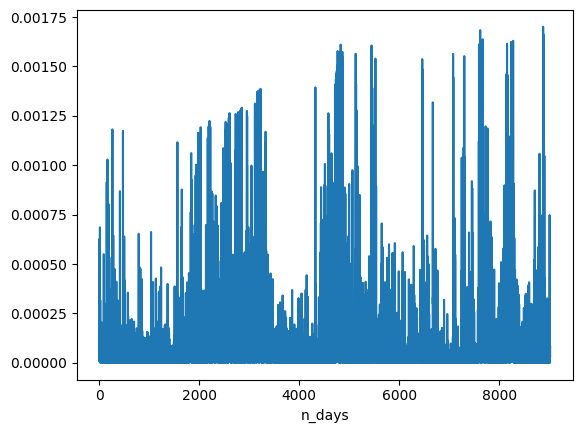

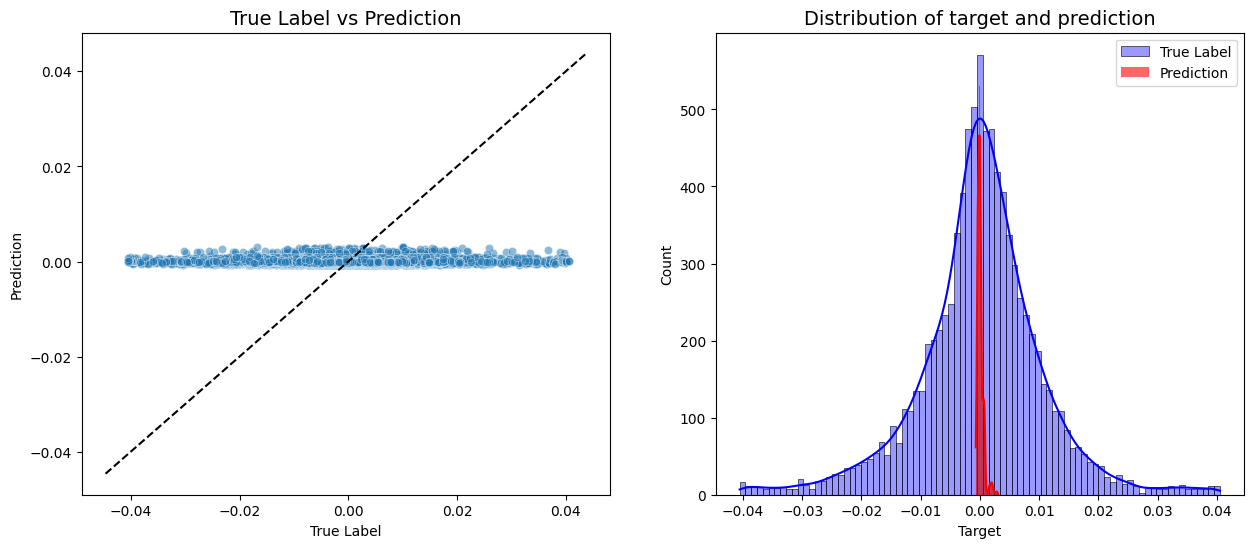

In [14]:
df_eval = fold_evaluation(train, target, preds, 0)
summary_evaluation(df_eval)

# Full test

Mean Squared Error: 0.00011
               min      mean       max
fold                                  
0     9.619108e-09  0.000078  0.001186
1     3.429497e-08  0.000102  0.000905
2     2.929218e-08  0.000246  0.001626
3     1.462146e-10  0.000079  0.000629
4     2.536497e-09  0.000054  0.000410
5     9.111546e-09  0.000071  0.001062
6     3.127333e-09  0.000118  0.001715


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


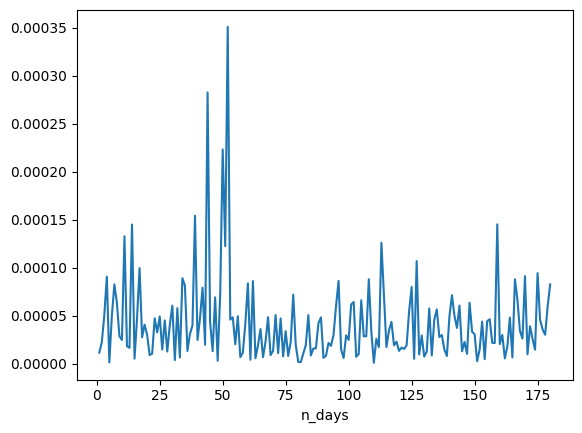

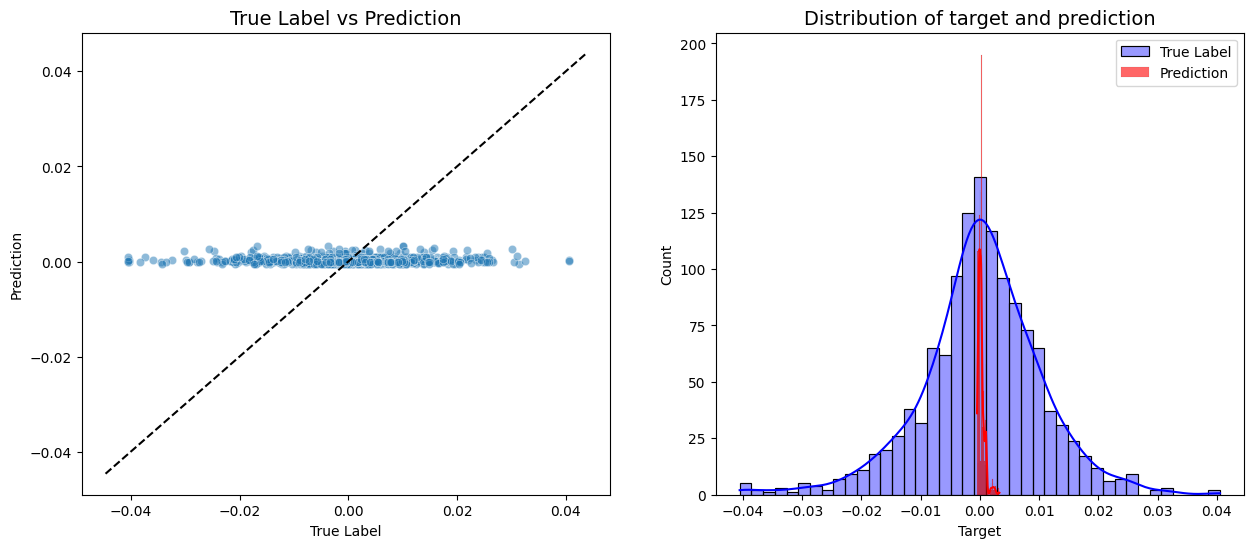

In [15]:
train = df[['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']]
target = df['market_forward_excess_returns']

dm = DailyModel(Ridge())

ts_folds = TimeSeriesSplit(n_splits=7, test_size=180)

cvscore = TSCrossValidate(data=train, target=target, cv=ts_folds, estimator=dm)
oof, res = cvscore.score()

summary_evaluation(res["folds_eval"])